<a href="https://colab.research.google.com/github/kinghim17/Walmart-/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Sales Analysis

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## visualisation of dataset


In [ ]:
file_path = 'Walmart_Sales_CB1799BACC.xlsx'
df = pd.read_excel(file_path)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


##  Group by city and branch, sum sales and revenue

In [ ]:
city_branch_performance = df.groupby(['City', 'Branch'])[['Quantity', 'Unit price']].sum().reset_index()

print(city_branch_performance)

        City Branch  Quantity  Unit price
0   Mandalay      A       637     6349.11
1   Mandalay      B       664     6623.73
2   Mandalay      C       519     5506.04
3  Naypyitaw      A       648     5953.55
4  Naypyitaw      B       604     6298.64
5  Naypyitaw      C       579     6315.57
6     Yangon      A       598     6342.88
7     Yangon      B       631     6329.25
8     Yangon      C       630     5953.36


## Group by branch and calculate the average price

In [ ]:
avg_price_per_branch = df.groupby('Branch')['Unit price'].mean().reset_index()

print(avg_price_per_branch)

  Branch  Unit price
0      A   54.360175
1      B   56.622412
2      C   56.072461


## Ensure the Sale Date is in datetime format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Group by product line, gender, payment, and month
sales_analysis = df_2019.groupby(['Product line', 'Gender', 'Payment', df_2019['Date'].dt.month])[['Quantity', 'Unit price']].sum().reset_index()

# Display the result
print(sales_analysis)

               Product line  Gender      Payment  Date  Quantity  Unit price
0    Electronic accessories  Female         Cash     1        52      534.48
1    Electronic accessories  Female         Cash     2       103      935.40
2    Electronic accessories  Female         Cash     3        51      622.23
3    Electronic accessories  Female  Credit card     1        54      371.20
4    Electronic accessories  Female  Credit card     2        39      444.19
..                      ...     ...          ...   ...       ...         ...
103       Sports and travel    Male  Credit card     2        27      410.63
104       Sports and travel    Male  Credit card     3        60      483.38
105       Sports and travel    Male      Ewallet     1        38      466.37
106       Sports and travel    Male      Ewallet     2        15      236.25
107       Sports and travel    Male      Ewallet     3        86      804.95

[108 rows x 6 columns]


## Display

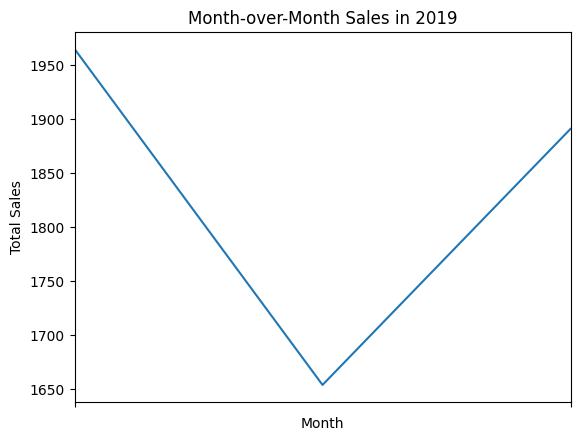

In [ ]:
# Example: Plot total sales by month for each product line
sales_analysis.groupby('Date')['Quantity'].sum().plot(kind='line')
plt.title('Month-over-Month Sales in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()